<a href="https://colab.research.google.com/github/sokrypton/casp15_analysis/blob/main/casp15_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
wget -qnc https://github.com/sokrypton/casp15_analysis/raw/main/results.zip
unzip -qqo results.zip

In [3]:
# parse results
GROUPS = []
for b in open("groups.txt"):
  GROUPS.append(b.rstrip())

results = {}
results_best = {}
for target_id in open("targets.txt"):
  target_id = target_id.rstrip()
  for n,line in enumerate(open(f"{target_id}.txt")):
    line = line.rstrip()
    if len(line) > 0:
      if n == 0:
        tags = line.split()
      else:
        outs = line.split()  
        x = dict(zip(tags,outs))
        y = x["GROUP_NAME"]
        if y not in results:
          results[y] = {}
          results_best[y] = {}
        model_num = int(x["Model"].replace("-","_").split("_")[1])
        if model_num == 1:
          results[y][target_id] = float(x["GDT_TS"])
        if target_id not in results_best[y]:
          results_best[y][target_id] = []
        results_best[y][target_id].append(float(x["GDT_TS"]))

In [6]:
GROUPS[:5]

['Yang-Server', 'UM-TBM', 'PEZYFoldings', 'Yang', 'DFolding']

Text(0.5, 0, 'BAKER (GDT_TS)')

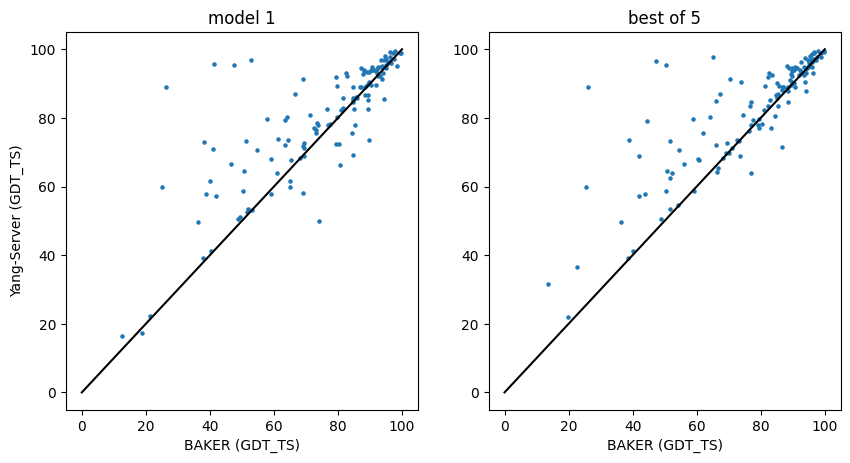

In [7]:
# HEAD TO HEAD COMPARISON
import matplotlib.pyplot as plt
import numpy as np
a = "BAKER"
b = "Yang-Server"
R = []
RB = []
for k in results[a]:
  if k in results[b]:
    R.append([results[a][k],results[b][k]])
    RB.append([np.max(results_best[a][k]),
               np.max(results_best[b][k])])
R = np.array(R)
RB = np.array(RB)

plt.figure(figsize=(10,5),dpi=100)
plt.subplot(1,2,1)
plt.title("model 1")
plt.scatter(R[:,0],R[:,1],s=5)
plt.xlabel(f"{a} (GDT_TS)")
plt.ylabel(f"{b} (GDT_TS)")
plt.plot([0,100],[0,100], color="black")
plt.subplot(1,2,2)
plt.title("best of 5")
plt.scatter(RB[:,0],RB[:,1],s=5)
plt.plot([0,100],[0,100], color="black")
plt.xlabel(f"{a} (GDT_TS)")

In [8]:
R = []
RB = []
for k in results["BAKER"]:
  R.append([])
  RB.append([])
  for b in GROUPS:
    if k in results[b]:
      R[-1].append(results[b][k])
      RB[-1].append(np.max(results_best[b][k]))
    else:
      R[-1].append(0)
      RB[-1].append(0)
    b = b.rstrip()    
R = np.array(R)
RB = np.array(RB)

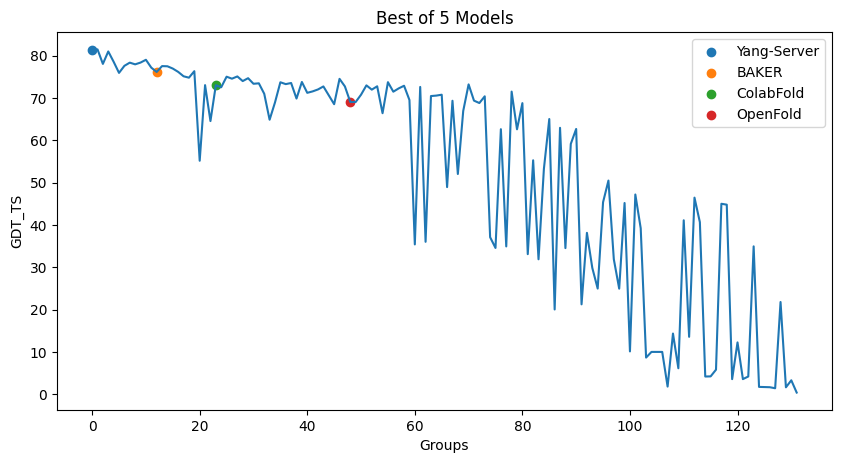

In [10]:
plt.figure(figsize=(10,5),dpi=100)
plt.title("Best of 5 Models")
plt.plot(RB.mean(0))
plt.xlabel("Groups")
plt.ylabel("GDT_TS")
for a in ["Yang-Server","BAKER","ColabFold","OpenFold"]:
  ID = np.where(np.array(GROUPS) == a)[0][0]
  plt.scatter(ID,RB[:,ID].mean(),label=a)
plt.legend()